In [801]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.image as mpimg

# Q2.1 PCA: 2-dimensional Toy Data 

In [802]:
pcaData2D = pd.read_csv('pca-data-2d.dat', sep="\s+", names=['x','y'])
pcaData2D

,x,y
0,2.4,-2.5
1,0.7,-0.5
2,2.9,-2.2
3,2.2,-1.9
4,3.0,-3.1
5,2.7,-2.3
6,1.6,-2.0
7,1.1,-1.0
8,1.6,-1.5
9,0.9,-1.1


In [803]:
pcaData2D.shape

(10, 2)

In [804]:
def centerize( df ):
    mean = np.mean( df, axis = 0 )
    centered = df - mean 
    return (centered, mean)

(centered_pcaData2D, _ ) = centerize(pcaData2D)

print(centered_pcaData2D)
print(np.mean(centered_pcaData2D, axis=0))

      x     y
0  0.49 -0.69
1 -1.21  1.31
2  0.99 -0.39
3  0.29 -0.09
4  1.09 -1.29
5  0.79 -0.49
6 -0.31 -0.19
7 -0.81  0.81
8 -0.31  0.31
9 -1.01  0.71
x    3.552714e-16
y    4.440892e-17
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb28fce10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb1c88978>]], dtype=object)

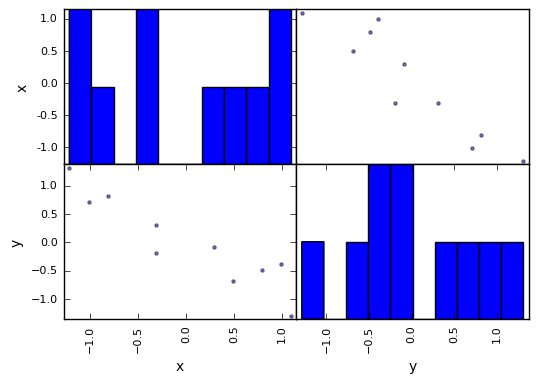

In [805]:
scatter_matrix( centered_pcaData2D )

In [806]:
class PCA:
    def __init__(self, X):
        # X's shape (items,dimensions)
        (centered, self.means) = centerize(X)
        cov = np.cov( centered.T )

        (eig_values, eig_vectors) = np.linalg.eig(cov)

        eig_idx = np.argsort(-eig_values)
        (self.eig_values, self.eig_vectors) = (eig_values[eig_idx], eig_vectors[:,eig_idx])
        
    def project(self, X):
        # X's shape (items,dimensions)
        X = X - self.means
        return np.dot(X, self.eig_vectors)
    
    def reconstruct(self, X, eig_vectors_idx):
        res = np.dot( X, self.eig_vectors[:, eig_vectors_idx].T )
        return res
    
my_pca = PCA(pcaData2D)
print(my_pca.eig_values)
print(my_pca.eig_vectors[:,0])

[ 1.28402771  0.0490834 ]
[ 0.73517866 -0.6778734 ]


In [807]:
my_pca.eig_vectors

array([[ 0.73517866,  0.6778734 ],
       [-0.6778734 ,  0.73517866]])

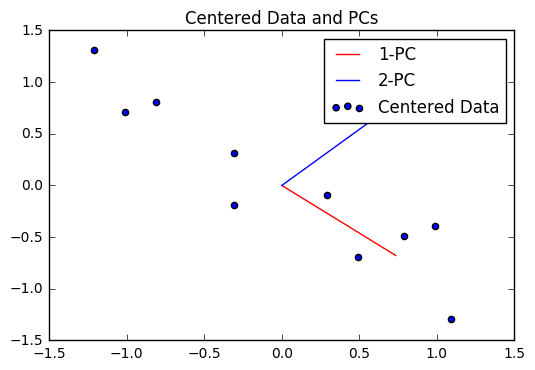

In [808]:
plt.scatter(centered_pcaData2D['x'], centered_pcaData2D['y'], label="Centered Data")
colors = ['r','b']
for i in range(len(my_pca.eig_values)):
    vector = my_pca.eig_vectors[:,i];
    plt.plot((0,vector[0]),(0,vector[1]), c= colors[i], label='%d-PC' % (i+1) )
    plt.legend()
plt.title('Centered Data and PCs')
plt.show()

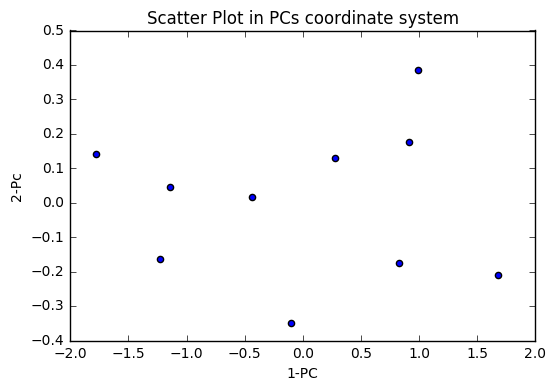

In [809]:
pcaData2D_projected_to_PCs = my_pca.project( pcaData2D )

plt.scatter( pcaData2D_projected_to_PCs[:, 0], pcaData2D_projected_to_PCs[:, 1])
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')

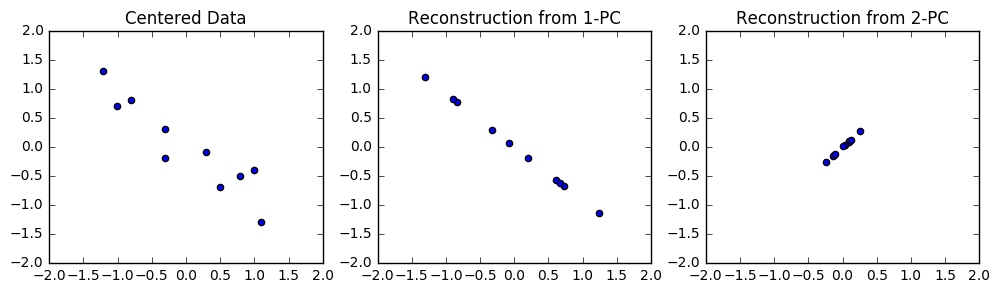

In [810]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.scatter( centered_pcaData2D['x'], centered_pcaData2D['y'] )
plt.title('Centered Data')

pc_idx = 0
reconstructed_pcaData2D = my_pca.reconstruct( pcaData2D_projected_to_PCs[:,pc_idx].reshape(10,1), [pc_idx])
plt.subplot(1,3,2)
plt.title('Reconstruction from %d-PC' % (pc_idx+1))
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.scatter( reconstructed_pcaData2D[:, 0], reconstructed_pcaData2D[:, 1])

pc_idx = 1
reconstructed_pcaData2D = my_pca.reconstruct( pcaData2D_projected_to_PCs[:,pc_idx].reshape(10,1), [pc_idx])
plt.subplot(1,3,3)
plt.title('Reconstruction from %d-PC' % (pc_idx+1))
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.scatter( reconstructed_pcaData2D[:, 0], reconstructed_pcaData2D[:, 1])

# Q2.2 PCA: 3-dimensional Toy Data 

In [811]:
pcaData3D = pd.read_csv('pca-data-3d.txt')
pcaData3D.describe()

,x,y,z
count,500.000000,500.000000,500.000000
mean,0.043555,0.091908,-0.059460
std,0.965748,1.345888,2.094110
min,-2.728321,-3.487070,-3.061867
25%,-0.658242,-0.840618,-2.045611
50%,0.055413,0.140944,-0.150139
75%,0.711236,0.985253,2.028950
max,2.303785,3.836981,3.028818


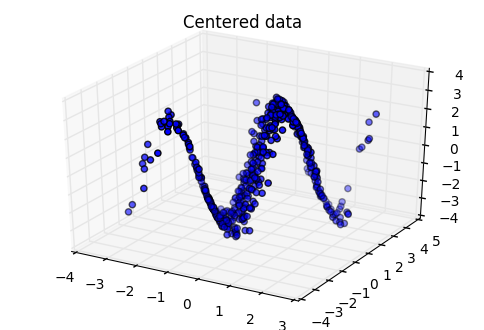

In [812]:
(centered_pcaData3D, _ ) = centerize(pcaData3D)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter( centered_pcaData3D.x, centered_pcaData3D.y, centered_pcaData3D.z )
plt.title('Centered data')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbf518978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb3f07748>]], dtype=object)

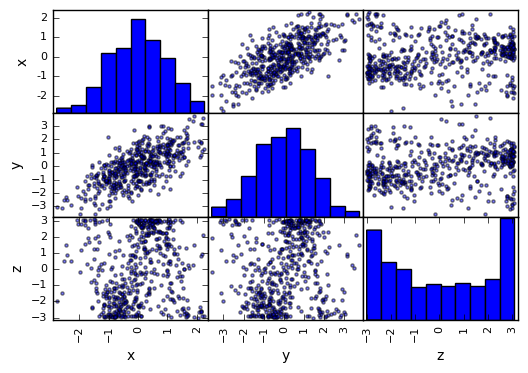

In [813]:
scatter_matrix(centered_pcaData3D)

In [814]:
my_pca3D = PCA(pcaData3D)

In [815]:
my_pca3D.eig_values

array([ 4.4947884 ,  2.24956199,  0.38503192])

In [816]:
my_pca3D.eig_vectors

array([[ 0.12121678,  0.51120047, -0.85087048],
       [ 0.1844957 ,  0.83065188,  0.52533684],
       [ 0.9753296 , -0.22066159,  0.00637466]])

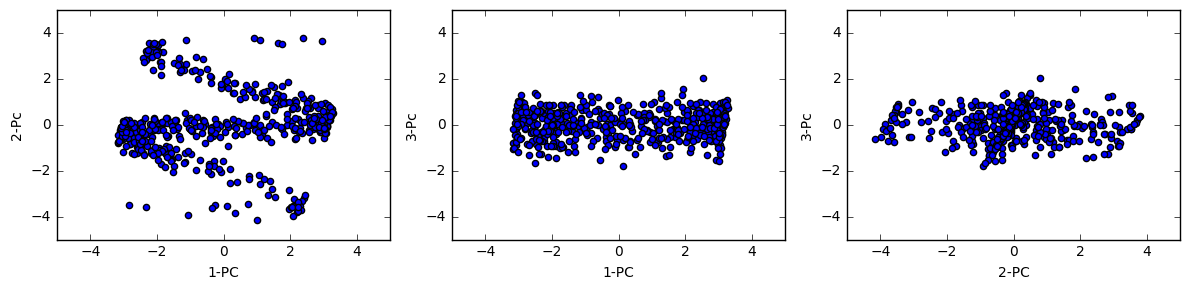

In [817]:
pcaData3D_projected_to_PCs = my_pca3D.project( pcaData3D )
plt.figure(figsize=(12,3))
scale = 5
for i in range(3):
    for j in range(i+1,3):
        plt.subplot(1,3,i+j)
        plt.scatter( pcaData3D_projected_to_PCs[:, i], pcaData3D_projected_to_PCs[:, j])
        plt.xlabel('%d-PC' % (i+1))
        plt.ylabel('%d-Pc' % (j+1))
        plt.ylim(-scale,scale)
        plt.xlim(-scale,scale)
plt.tight_layout()

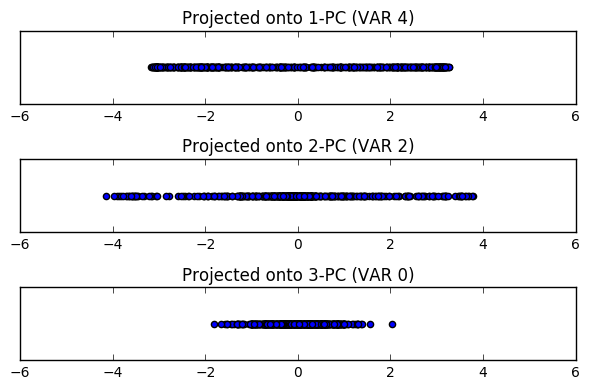

In [818]:
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.xlim(-6,6)
    data = pcaData3D_projected_to_PCs[:,i]
    variance = np.var(data)
    plt.title('Projected onto %d-PC (VAR %d)' %(i+1, variance))

    plt.yticks([])
    plt.scatter( data, [0]*pcaData3D_projected_to_PCs.shape[0])
plt.tight_layout()

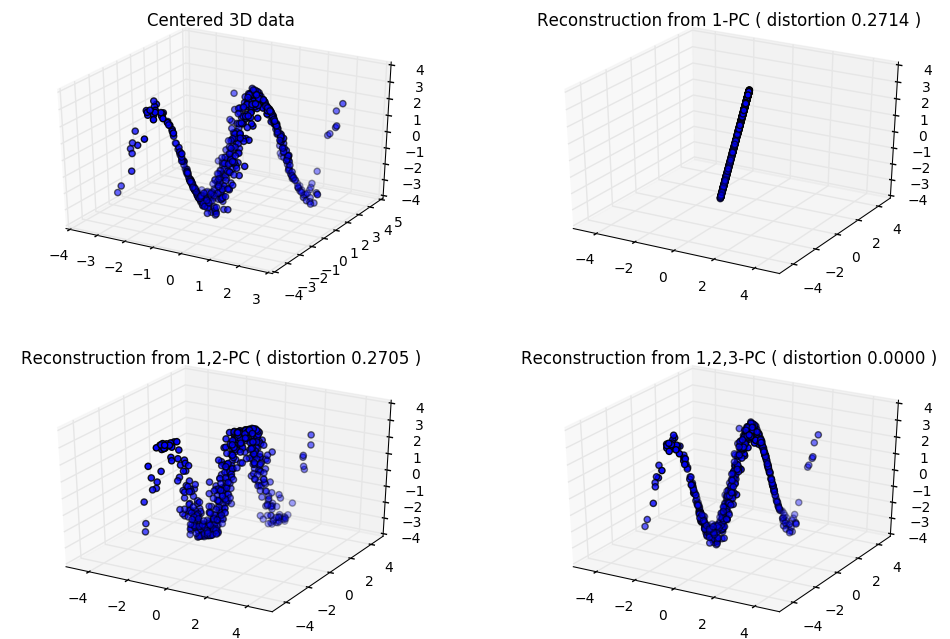

In [819]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,2,1, projection='3d')

ax.scatter( centered_pcaData3D.x, centered_pcaData3D.y, centered_pcaData3D.z )
plt.title('Centered 3D data')

for i in range(3):
    pc_idx = range(i+1)
    reconstructed_pcaData3D = my_pca3D.reconstruct( pcaData3D_projected_to_PCs[:,pc_idx].reshape(500,len(pc_idx)), pc_idx)
    ax = fig.add_subplot(2,2,i+2, projection='3d')

    plt.ylim(-5,5)
    plt.xlim(-5,5)
    
    diff = centered_pcaData3D - reconstructed_pcaData3D    
    distortion = np.linalg.norm(diff, axis=1)[0]
    
    ax.scatter( reconstructed_pcaData3D[:, 0], reconstructed_pcaData3D[:, 1], reconstructed_pcaData3D[:,2] )
    plt.title('Reconstruction from %s-PC ( distortion %.4f )' % (','.join(map(lambda x: str(x+1),pc_idx)), distortion))

# Q2.2.c discussion

# Q2.3 Projections of a dynamical system

In [820]:
expData = pd.read_csv('expDat.txt',index_col=0)
expData.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,4.810000,4.840000,5.360000,5.420000,4.880000,5.160000,4.99000,5.040000,4.65000,4.810000,5.030000,5.140000,5.020000,4.870000,5.120000,4.680000,4.9700,4.880000,5.170000,5.080000
std,3.991645,3.719237,4.265246,4.264441,4.013311,3.759755,3.87297,3.795053,3.82542,3.329376,4.312198,4.189983,3.926033,3.791684,4.025876,3.703343,3.9631,4.053381,4.476775,3.945794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000,3.50000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,3.500000,3.000000,4.000000
75%,7.000000,7.000000,7.000000,7.250000,8.000000,8.000000,8.00000,8.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.250000,7.0000,7.000000,8.000000,6.000000
max,17.000000,17.000000,19.000000,18.000000,17.000000,16.000000,18.00000,15.000000,18.00000,15.000000,20.000000,19.000000,16.000000,15.000000,18.000000,16.000000,16.0000,17.000000,23.000000,20.000000


In [821]:
print(expData.shape)

(100, 20)


In [822]:
my_pca_dynamic = PCA(expData)

print('First 2 eigen values')
print(my_pca_dynamic.eig_values[0:2])
print('and their corresponding PC')
print(my_pca_dynamic.eig_vectors[:,0:2])

First 2 eigen values
[ 159.49341723   67.25799252]
and their corresponding PC
[[ 0.23170068 -0.21830578]
 [ 0.20360727 -0.19920182]
 [ 0.25007147 -0.22656499]
 [ 0.23686223  0.25687137]
 [ 0.24044926  0.15817077]
 [ 0.20440472  0.22088493]
 [ 0.24056995 -0.19487112]
 [ 0.24586141 -0.16185434]
 [ 0.17737701  0.22633286]
 [ 0.19751861 -0.12746   ]
 [ 0.23351045 -0.2675393 ]
 [ 0.25924694 -0.17544956]
 [ 0.20479872  0.25260932]
 [ 0.20921262  0.25479589]
 [ 0.21936356  0.24699672]
 [ 0.1823281   0.24628233]
 [ 0.22130098  0.21538704]
 [ 0.21830107  0.24338423]
 [ 0.25554948 -0.2849078 ]
 [ 0.21697206 -0.22436526]]


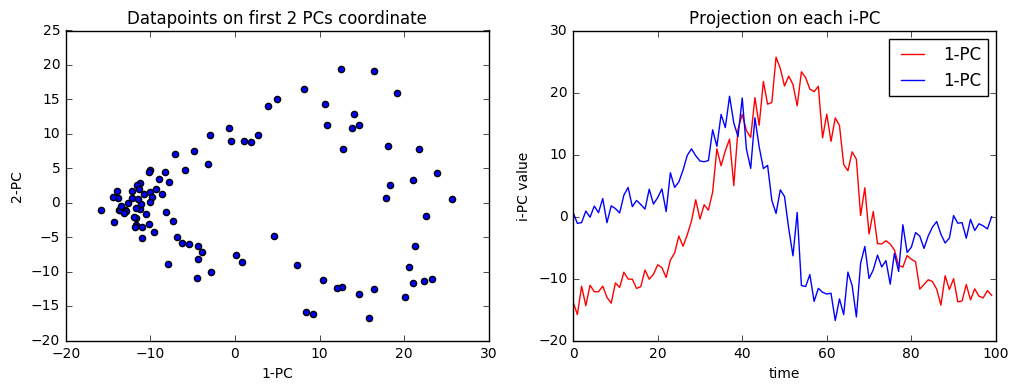

In [823]:
projected_dynamic_sys = my_pca_dynamic.project(expData)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(projected_dynamic_sys[:,0], projected_dynamic_sys[:,1])
plt.xlabel('1-PC')
plt.ylabel('2-PC')
plt.title('Datapoints on first 2 PCs coordinate')

plt.subplot(1,2,2)
plt.xlabel('time')
plt.ylabel('i-PC value')
plt.plot( range(projected_dynamic_sys.shape[0]) , projected_dynamic_sys[:,0], c='r', label='1-PC')
plt.plot( range(projected_dynamic_sys.shape[0]) , projected_dynamic_sys[:,1], c='b', label='1-PC')
plt.title('Projection on each i-PC')
plt.legend()

In [824]:
cols = list(expData.columns)
np.random.shuffle(cols)
print(cols)

['V19', 'V3', 'V2', 'V1', 'V18', 'V4', 'V11', 'V16', 'V12', 'V7', 'V8', 'V14', 'V5', 'V9', 'V15', 'V13', 'V10', 'V6', 'V20', 'V17']


In [825]:
shuffled_exp_data = expData[cols]

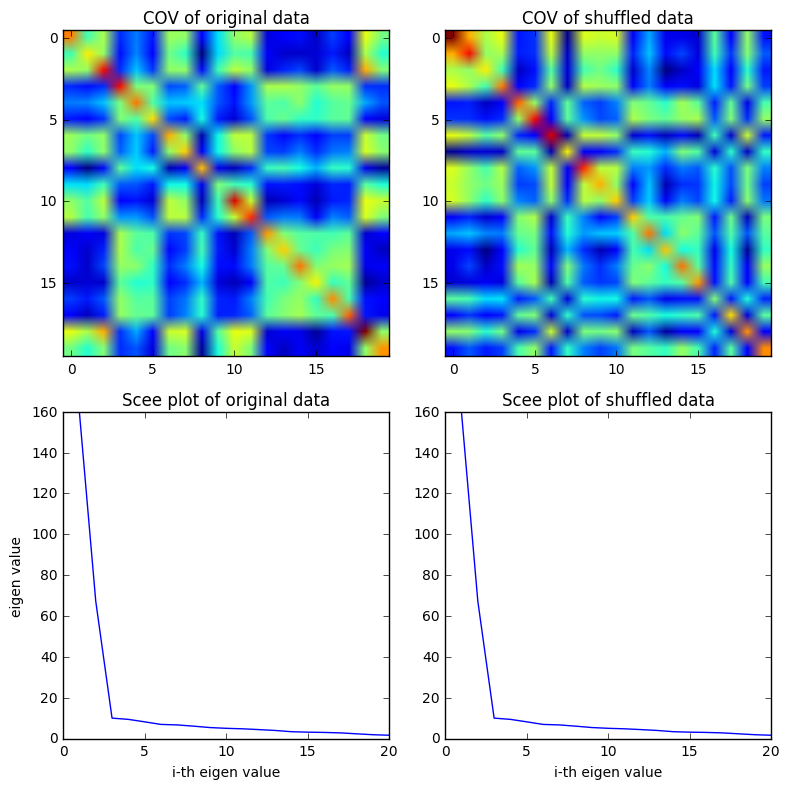

In [826]:
cov_original_data = np.cov(expData.T)
cov_shuffled_data = np.cov(shuffled_exp_data.T)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('COV of original data')
plt.imshow(cov_original_data)

plt.subplot(2,2,2)
plt.title('COV of shuffled data')
plt.imshow(cov_shuffled_data)

idx = range(1,21)

plt.subplot(2,2,3)
plt.title('Scee plot of original data')
plt.plot( idx, my_pca_dynamic.eig_values )
plt.ylabel('eigen value')
plt.xlabel('i-th eigen value')

plt.subplot(2,2,4)
plt.title('Scee plot of shuffled data')
plt.plot( idx, PCA(shuffled_exp_data).eig_values )
plt.xlabel('i-th eigen value')

plt.tight_layout()

### 2.3.e shuffling items instead of columns .. discuss
COV won't be affected

# 2.4 Image data compression and reconstruction

In [827]:
import matplotlib.image as mpimg
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
    

In [828]:
b1 = mpimg.imread('./imgpca/b%d.jpg'%(1))


def loadImageMatrix(cat, n=10, patch_size=(16,16), patches_per_img=500):
    total_cols = patch_size[0]*patch_size[1]
    matrix = np.zeros((n*patches_per_img, total_cols))
    for i in range(n):
        img = mpimg.imread('./imgpca/%s%d.jpg'%(cat, i+1))
        str_idx = i*patches_per_img
        patches = extract_patches_2d(img, patch_size=patch_size, max_patches = patches_per_img )
        matrix[ str_idx:str_idx+patches_per_img, : ] = patches.reshape(patches_per_img, total_cols )

    return matrix

matrix_building = loadImageMatrix('b')

In [829]:
pca_building = PCA(matrix_building)
print(pca_building.eig_values[0:24])

[ 601290.7257806   101689.62854278   34513.42715735   25054.224091
   13592.79648532   10875.11655875    9820.11913654    7882.8048138
    7063.06026047    5440.22562277    4876.38088857    4284.30818015
    3980.81294815    3399.08077795    3366.27684556    3108.07952354
    3015.06176959    2854.01970476    2677.13532837    2409.84662606
    2291.69329597    2189.1949979     2140.79853068    2046.4768254 ]


First 24 eigen vectors of `building` category


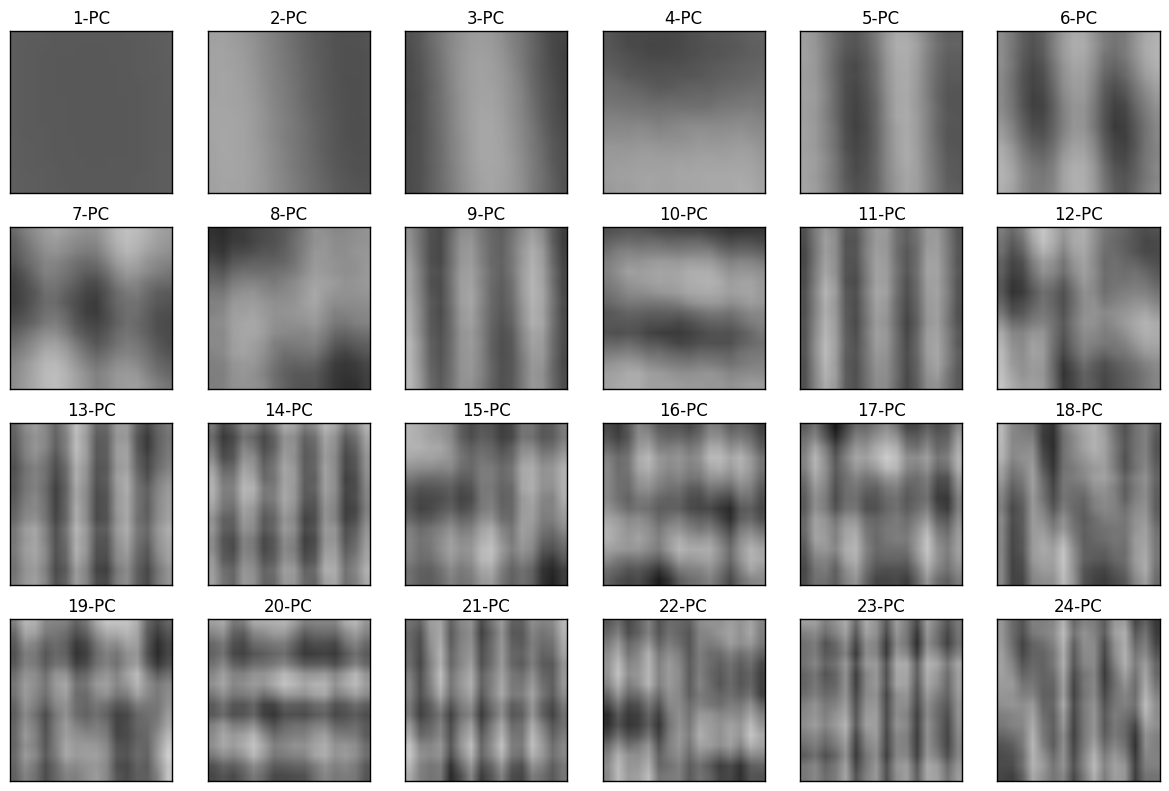

In [830]:
def plotPCs(pca_obj, cmap="gray", vmin=None, vmax=None):
    plt.figure(figsize=(12,8))
    for i in range(4):
        for j in range(6):
            idx = i*6+j
            plt.subplot(4,6,idx+1)
            plt.imshow(pca_obj.eig_vectors[:, idx].reshape(16,16), cmap=cmap, vmin=vmin, vmax=vmax)
            plt.title( "%d-PC" %(idx+1))
            plt.xticks([])
            plt.yticks([])
    plt.tight_layout()
print('First 24 eigen vectors of `building` category')
plotPCs(pca_building, vmin=np.min(pca_building.eig_vectors), vmax=np.max(pca_building.eig_vectors))

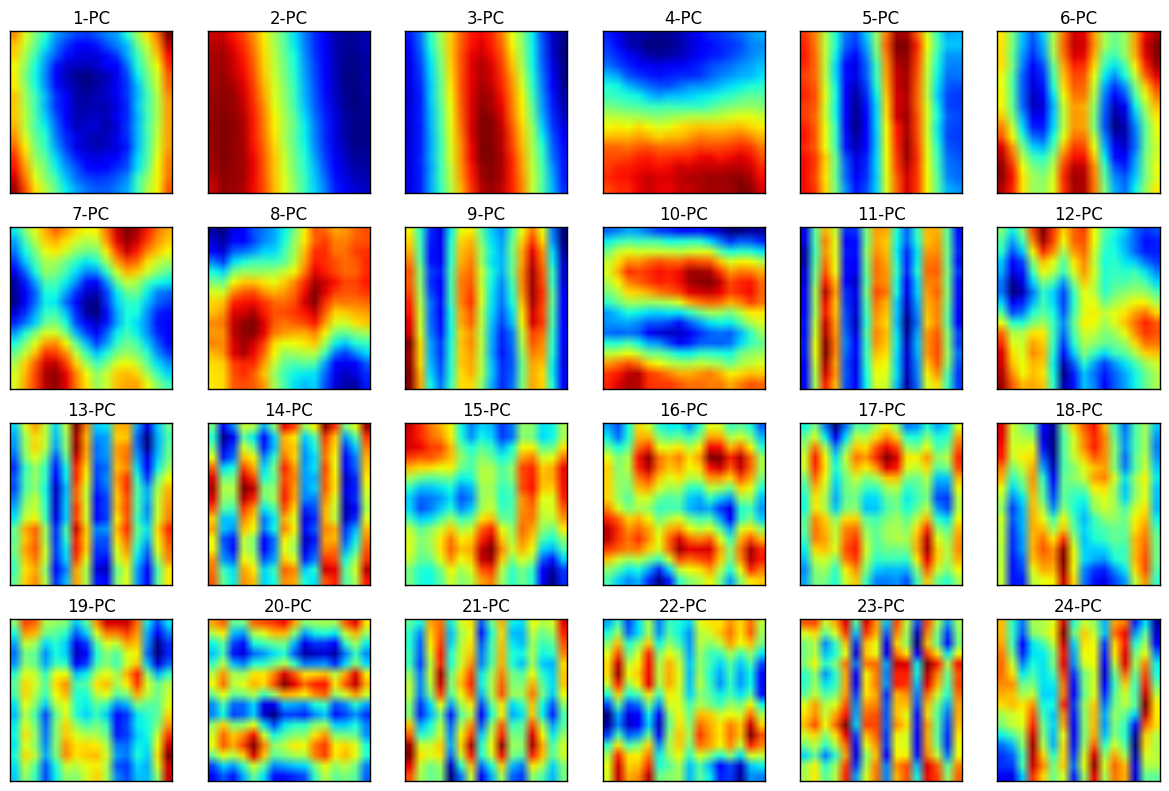

In [831]:
plotPCs(pca_building,cmap="jet")
# plotPCs(pca_building)

In [832]:
matrix_nature = loadImageMatrix('n')
pca_nature = PCA(matrix_nature)

First 24 eigen vectors of `nature` category


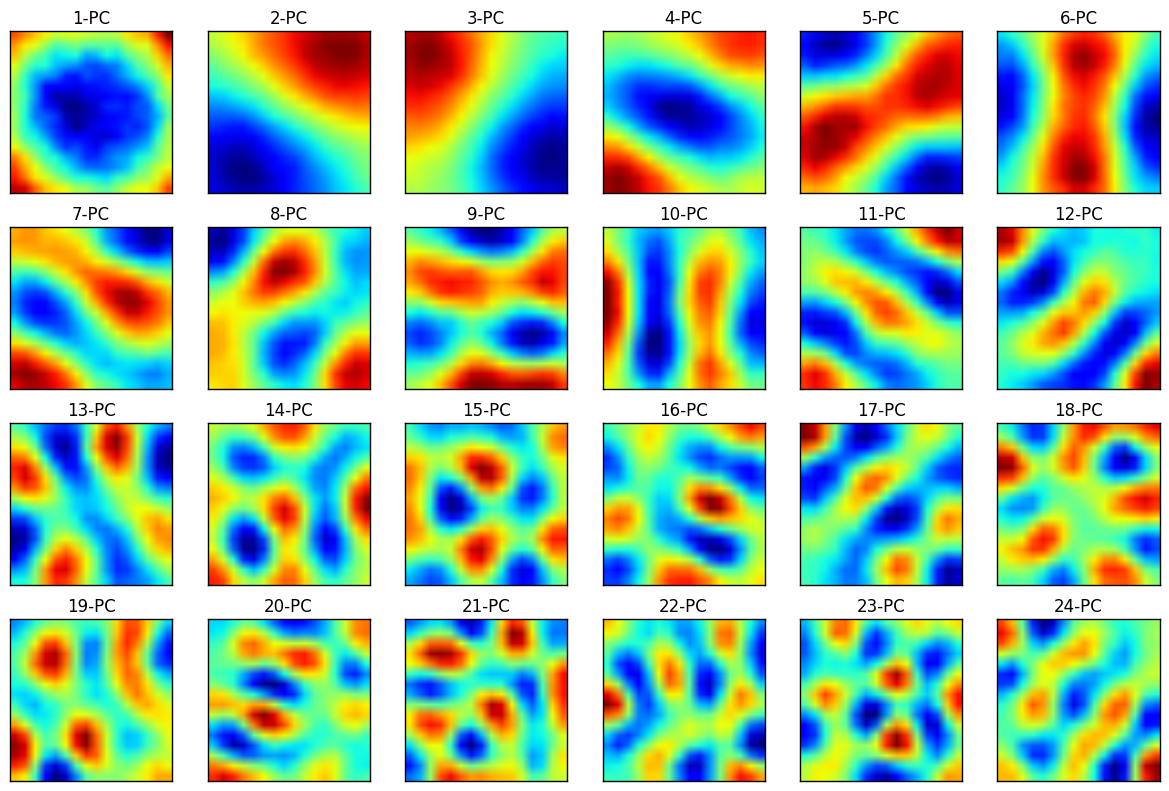

In [833]:
print('First 24 eigen vectors of `nature` category')
plotPCs(pca_nature, cmap="jet")

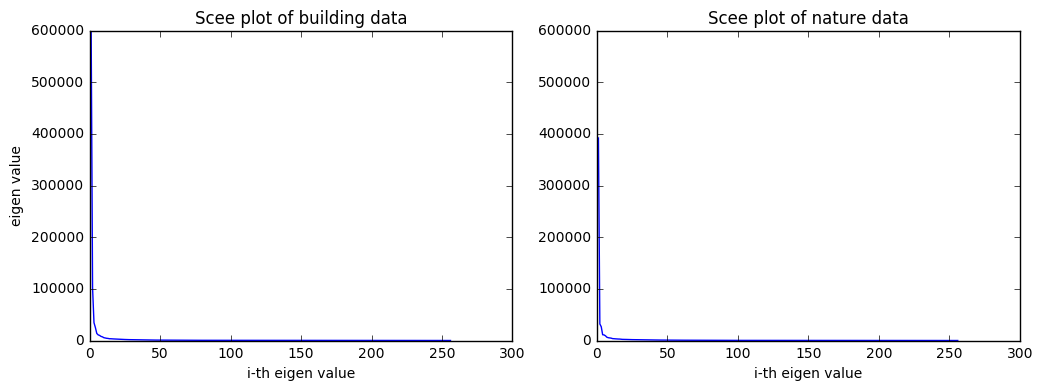

In [834]:
idx = range(1, 16*16+1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Scee plot of building data')
plt.plot( idx, pca_building.eig_values )
plt.ylim(0,600000)
plt.ylabel('eigen value')
plt.xlabel('i-th eigen value')

plt.subplot(1,2,2)
plt.title('Scee plot of nature data')
plt.plot( idx, pca_nature.eig_values )
plt.ylim(0,600000)
plt.xlabel('i-th eigen value')

In [835]:
def findNoPCs(pca_object, variance_preserved_threshold = 0.95 ):
    cum_sum_vars = np.cumsum(pca_object.eig_values)
    preserved_ratios = cum_sum_vars / cum_sum_vars[-1]


    no_pcs = np.searchsorted(preserved_ratios, variance_preserved_threshold )
    print("To preserve %d%% of variance" % (variance_preserved_threshold*100) )
    print("%3d PCs required and yielding compression ratio at %.4f" % (no_pcs, 256*256/(no_pcs*256)))
    
    return no_pcs
    
print("Buiding category")
for i in [0.90,0.95,0.99]:
    findNoPCs(pca_building, variance_preserved_threshold=i )

Buiding category
To preserve 90% of variance
 16 PCs required and yielding compression ratio at 16.0000
To preserve 95% of variance
 45 PCs required and yielding compression ratio at 5.6889
To preserve 99% of variance
157 PCs required and yielding compression ratio at 1.6306


In [836]:
print("Nature category")
for i in [0.90,0.95,0.99]:
    findNoPCs(pca_nature, variance_preserved_threshold=i )

Nature category
To preserve 90% of variance
 25 PCs required and yielding compression ratio at 10.2400
To preserve 95% of variance
 57 PCs required and yielding compression ratio at 4.4912
To preserve 99% of variance
140 PCs required and yielding compression ratio at 1.8286


(154715, 16, 16)


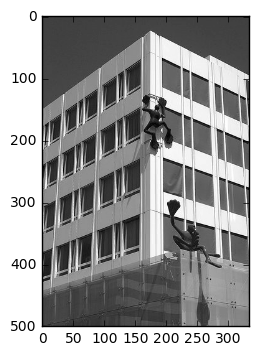

In [837]:
import math

filename = "./imgpca/b7.jpg"
img = mpimg.imread(filename)
plt.imshow(img, cmap="gray")
img_patches = extract_patches_2d(img, patch_size=(16,16))
print(img_patches.shape)

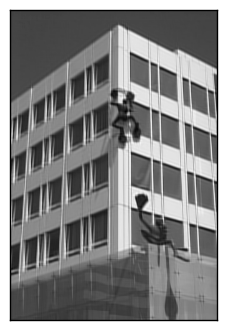

In [847]:
def plotProjectAndReconstruct(pca_object, img_patches, img_size, no_PCs=256):
    total_patches = img_patches.shape[0]
    projected = pca_object.project(img_patches.reshape(total_patches,256))

    idx = range(no_PCs)
    reconstructed = pca_object.reconstruct(projected[:, idx], idx )
    reconstructed = reconstructed.reshape( total_patches,16,16)
    img = reconstruct_from_patches_2d(reconstructed, img_size )
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    
plotProjectAndReconstruct(pca_building, img_patches, img.shape, no_PCs=45 )

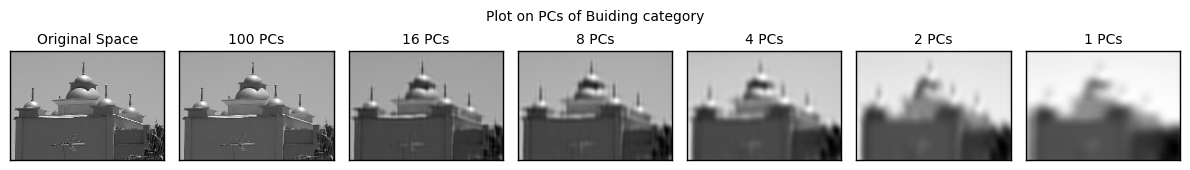

In [839]:
def plotImageByPCsOfCategory(imgname, pca_object, label=""):
    total_dims = len(pca_object.eig_values);
    
    fig = plt.figure(figsize=(12,2))
    fig.suptitle(label)
    
    img = mpimg.imread(imgname)
    patches = extract_patches_2d(img, patch_size=(16,16))

    plt.subplot(1,7,1)
    plotProjectAndReconstruct(pca_object, patches, img.shape, no_PCs=total_dims )
    plt.title("Original Space", fontsize=10)
    
    no_pcs = [100,16,8,4,2,1]

    for i in range(len(no_pcs)):
        plt.subplot(1,7,i+2)
        plotProjectAndReconstruct(pca_object, patches, img.shape, no_PCs=no_pcs[i] )
        plt.title("%d PCs" % no_pcs[i], fontsize=10)
    fig.tight_layout()
plotImageByPCsOfCategory("./imgpca/b9_2.jpg", pca_building, label="Plot on PCs of Buiding category")

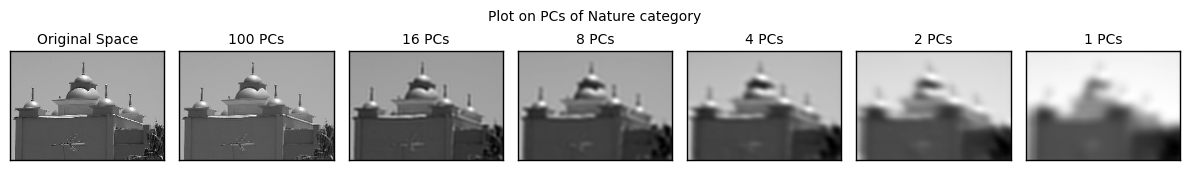

In [840]:
plotImageByPCsOfCategory("./imgpca/b9_2.jpg", pca_nature, label="Plot on PCs of Nature category")

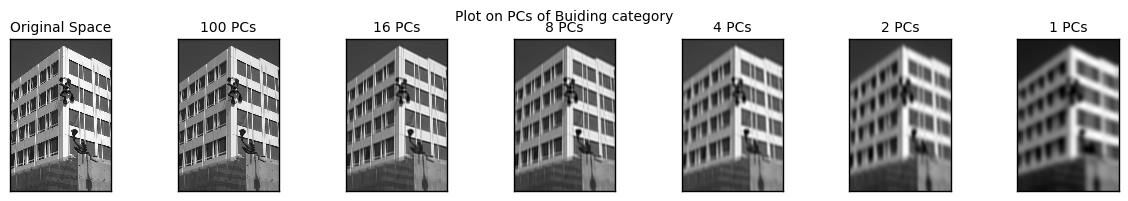

In [841]:
plotImageByPCsOfCategory("./imgpca/b7.jpg", pca_building, label="Plot on PCs of Buiding category")

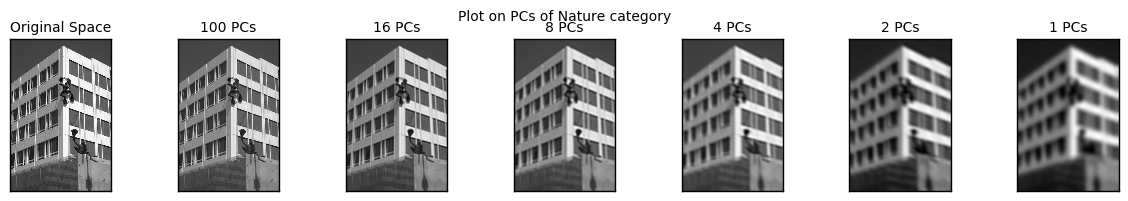

In [842]:
plotImageByPCsOfCategory("./imgpca/b7.jpg", pca_nature, label="Plot on PCs of Nature category")

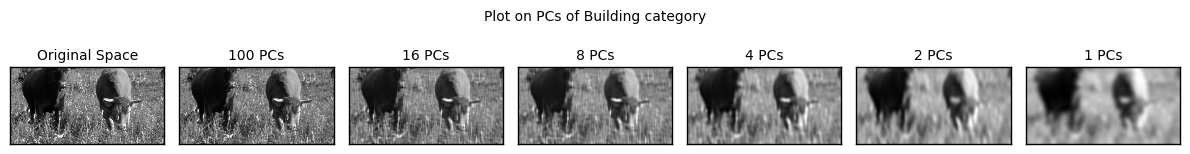

In [843]:
plotImageByPCsOfCategory("./imgpca/n5.jpg", pca_building, label="Plot on PCs of Building category")

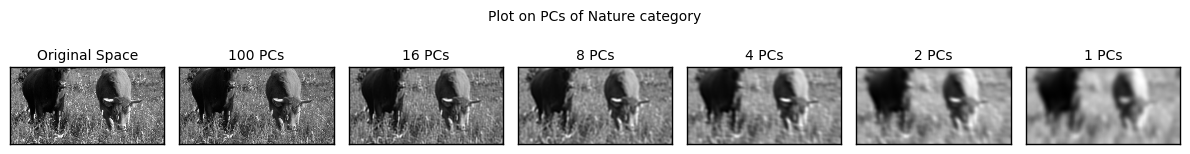

In [844]:
plotImageByPCsOfCategory("./imgpca/n5.jpg", pca_nature, label="Plot on PCs of Nature category")